# Exercício Regressão Linear com PyTorch

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se programação totalmente tensores PyTorch com:
- o cálculo do gradiente 
- a função de perda e 
- atualização dos parâmetros é feita de forma explícita.
- A rede é criada com uma classe

## Importação dos pacotes

In [1]:
%matplotlib inline
import torch

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)

def print_assert(r):
    if r:
        return 'OK!'
    else:
        return 'Incorreto!'

## Leitura dos dados

In [2]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = torch.FloatTensor(data[:,0:1])
y_train = torch.FloatTensor(data[:,1:2])

n_samples = x_train.size(0)
print('x_train.shape:',x_train.size(), type(x_train))
print('y_train.shape:',y_train.size(), type(y_train))

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: torch.Size([50, 1]) <class 'torch.FloatTensor'>
y_train.shape: torch.Size([50, 1]) <class 'torch.FloatTensor'>
x_train[:5]:
 
 7.0000
 6.4000
 6.9000
 5.5000
 6.5000
[torch.FloatTensor of size 5x1]

y_train[:5]:
 
 4.7000
 4.5000
 4.9000
 4.0000
 4.6000
[torch.FloatTensor of size 5x1]



## Normalização dos dados

In [3]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()

## Exercício 1 - criação do `x_train_bias`

faça o `x_train_bias` ser uma matriz com zeros na primeira coluna e x_train na segunda coluna.

Dica: você pode precisar da função [torch.cat](http://pytorch.org/docs/master/torch.html#torch.cat) e [torch.ones](http://pytorch.org/docs/master/torch.html#torch.ones).

In [4]:
x_train_bias = torch.cat((torch.ones(n_samples, 1), x_train), dim=1)
print(x_train_bias.size())

torch.Size([50, 2])


In [5]:
# Verificação do exercício - Execute para testar sua implementação

print('x_train_bias é um tensor: {}'.format(print_assert(
    isinstance(x_train_bias, torch.FloatTensor)
)))

    
print('tamanho do x_train_bias: {}'.format(print_assert(
    x_train_bias.size() == torch.Size([50, 2])
)))

print('primeira coluna é só de uns: {}'.format(print_assert(
    (x_train_bias[:, 0] - torch.ones(n_samples)).sum() == 0
)))

print('segunda coluna é igual a x_train: {}'.format(print_assert(
    (x_train_bias[:, 1] - x_train).sum() == 0
)))

x_train_bias é um tensor: OK!
tamanho do x_train_bias: OK!
primeira coluna é só de uns: OK!
segunda coluna é igual a x_train: OK!


# Linear Regression Model

In [6]:
class Net():
    def __init__(self, weight):
        self.weight = weight
    
    def __call__(self, x_bias):
        return x_bias.matmul(torch.t(self.weight))

## Inicialização dos parâmetros

In [7]:
weight = torch.zeros(1,2)
#weight = torch.rand(1,2) * 0.2 - 0.1  # valores no intervalo [-0.1, 0.1]
print(weight)


 0  0
[torch.FloatTensor of size 1x2]



In [8]:
net = Net(weight)

## Testando o predict da rede

In [9]:
net(torch.ones((4,2)))


 0
 0
 0
 0
[torch.FloatTensor of size 4x1]

## Exercício 2 - Treinamento

Refaça o código de treinamento da rede, mas agora utilizando somente Tensores do PyTorch. Faça o mesmo procedimento que o notebook [LinearRegressionIrisNumPy](LinearRegressionIrisNumPy.ipynb). Para consultar as operações disponíveis no PyTorch use a [documentação do PyTorch](http://pytorch.org/docs/master/torch.html).

Funções que podem ser úteis:
- torch.t
- torch.mean
- torch.matmul

In [10]:
num_epochs = 10
learning_rate = 0.5

for epoch in range(num_epochs):
    inputs = x_train_bias
    target = y_train

    # forward - predict
    out = net(inputs)

    #loss cálculo da função de perda
    loss = torch.mean((out - y_train)**2)
    
    # cálculo do gradiente pelas derivadas parciais
    weight_grad = (2.0/n_samples) * torch.t(x_train_bias).matmul(x_train_bias.matmul(torch.t(net.weight)) - y_train)
    
    # gradiente descendente
    net.weight = net.weight - learning_rate * torch.t(weight_grad)
    
    # verbose
    if (epoch+1) % 2 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))

Epoch[2/10], loss: 0.055997
Epoch[4/10], loss: 0.029729
Epoch[6/10], loss: 0.028139
Epoch[8/10], loss: 0.026914
Epoch[10/10], loss: 0.025905


## Predict

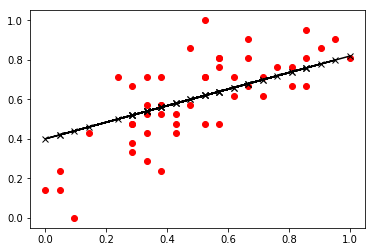

In [11]:
y_pred = net(x_train_bias)
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), y_pred.numpy(), 'kx-', label='Fitting Line')
plt.show()

## Parâmetro aprendido

In [12]:
print(net.weight)


 0.4002  0.4183
[torch.FloatTensor of size 1x2]



## Valor ótimo, solução analítica

In [13]:
x_bias = x_train_bias
y = y_train
x_bias_t = torch.t(x_bias)
w_opt = (torch.inverse(x_bias_t.mm(x_bias)).mm(x_bias_t)).mm(y)
print(torch.t(w_opt))


 0.2613  0.6865
[torch.FloatTensor of size 1x2]

